## Implimentation Support Vector Machine(SVM)---Type 1

# 1. Introduction to SVM

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

In [ ]:
#Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load data from csv file
df=pd.read_csv('/content/drive/MyDrive/cell_samples.csv')
df.tail()#first 5 rows
df.shape
df.size
df.count()
df['Class'].value_counts()
df.tail()#first 5 rows

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


<Axes: xlabel='Clump', ylabel='UnifSize'>

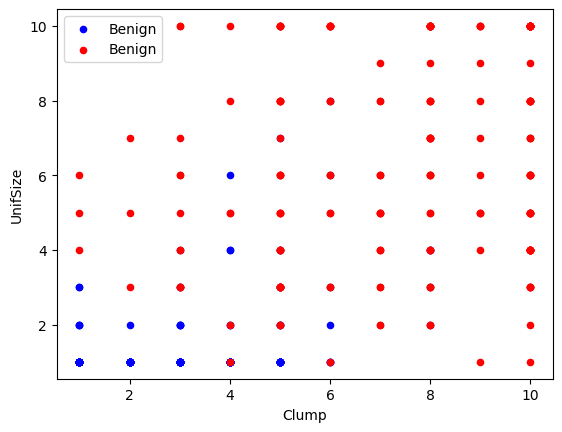

In [ ]:
#Distribution of classes
benign_df=df[df['Class']==2][0:200]
malignant_df=df[df['Class']==4][0:200]

axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Benign',ax=axes)
# help(benign_df.plot)

In [ ]:
#Identifying unwanted rows
df.dtypes

df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
#To remove unwanted columns
df.columns
feature_df=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
              'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X=np.array(feature_df)
y=np.array(df['Class'])

X[0:5]
y[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
#divide the data into train and test
#df(100)--->Train(80 rows)/test(20rows)

#Train(X,y) ## X itself is a 2D array,## y is 1D
#Test(X,y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
#546*9
X_train.shape
y_train.shape
X_test.shape#137 *9
y_test.shape #137*1

(137, 9)

In [ ]:
#Modelling
from sklearn import svm
'''
*4 type of kernels
    1.linear
    2.polynomial
    3.RBF(Radial basis fun)
    4.sigmoid
'''

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

In [1]:
#Evaluation of results
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

NameError: ignored

## SVM Type 2

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)